Assignment 1: 



Please submit to Gradescope
- a PDF containing all outputs (by executing **Run all**)
- your ipynb notebook containing all the code

I understand the policy on academic integraty (collaboration and the use of online material).
Please sign your name here: Shubham Ramraja Takbhate 


# Part A: Hybrid Image (25 Points)

## Overview

A hybrid image is the sum of a *low-pass filtered* version of the one image and a *high-pass filtered* version of a second image. There is a free parameter, which can be tuned for each image pair, which controls how much high frequency to remove from the first image and how much low frequency to leave in the second image. This is called the “cutoff-frequency”. In the paper it is suggested to use two cutoff frequencies (one tuned for each image) and you are free to try that, as well. In the starter code, the cutoff frequency is controlled by changing the standard deviation of the Gausian filter used in constructing the hybrid images. [This](https://drive.google.com/uc?id=187FjBJLwnYXhylx08Vdh1SAA3AO-imYv) is the sample example.

NOTE: 

1. Reading [this](https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf) will help in understanding Part A.

2. You can use any image processing libraries of your choice such as skimage or cv2; in python.

We provided 7 pairs of aligned images. The alignment is important because it affects the perceptual grouping (read the paper for details). We encourage you to create additional examples (e.g. change of expression, morph between different objects, change over time, etc.).

You are required to provide **THREE hybrid image results** and for ONE of your favorite result, please provide answers to the following **FOUR sub-parts** mentioned in the write-up.

## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [1]:
# Download Data -- run this cell only one time per runtime
!gdown 1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
!unzip "/content/hybrid_pyramid_input.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
To: /content/hybrid_pyramid_input.zip
100% 2.19M/2.19M [00:00<00:00, 146MB/s]
Archive:  /content/hybrid_pyramid_input.zip
replace /content/data/Afghan_girl_before.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/data/Afghan_girl_before.jpg  
  inflating: /content/data/motorcycle.bmp  
  inflating: /content/data/cat.bmp   
  inflating: /content/data/makeup_before.jpg  
  inflating: /content/data/fish.bmp  
  inflating: /content/data/bicycle.bmp  
  inflating: /content/data/makeup_after.jpg  
  inflating: /content/data/plane.bmp  
  inflating: /content/data/marilyn.bmp  
  inflating: /content/data/dog.bmp   
  inflating: /content/data/Afghan_girl_after.jpg  
  inflating: /content/data/submarine.bmp  
  inflating: /content/data/bird.bmp  
  inflating: /content/data/einstein.bmp  


## Code

In [2]:
from traitlets.utils.descriptions import repr_type
# Helper Functions
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import scipy as sp
from scipy import signal
from scipy.ndimage import gaussian_filter
def vis_hybrid_image(hybrid_image):
  hybrid_image=hybrid_image/255
  scales = 5
  scale_factor = 0.5
  padding = 5
  original_height = hybrid_image.shape[0]
  #num_colors = 0 # counting how many color channels the input has
  output = hybrid_image
  cur_image = hybrid_image

  for i in range(2, scales):
      # add padding
      output = np.concatenate((output, np.ones((original_height, padding), dtype=int)), axis=1)      
      # dowsample image;
      width = int(cur_image.shape[1] * scale_factor)
      height = int(cur_image.shape[0] * scale_factor)
      dim = (width, height)
      cur_image = cv2.resize(cur_image, dim, interpolation = cv2.INTER_LINEAR)
      # pad the top and append to the output
      tmp = np.concatenate((np.ones((original_height-cur_image.shape[0], cur_image.shape[1])), cur_image), axis=0)
      output = np.concatenate((output, tmp), axis=1)
  
  output = (output*255).astype(np.uint8)
  return output


def vis_hybrid_color_image(hybrid_image):
  
  scales = 5
  scale_factor = 0.5
  padding = 5
  original_height = hybrid_image.shape[0]
  num_colors = hybrid_image.shape[2] # counting how many color channels the input has
  output = hybrid_image
  cur_image = hybrid_image

  for i in range(2, scales):
      # add padding
      output = np.concatenate((output, np.ones((original_height, padding, num_colors), dtype=int)), axis=1)      
      # dowsample image;
      width = int(cur_image.shape[1] * scale_factor)
      height = int(cur_image.shape[0] * scale_factor)
      dim = (width, height)
      cur_image = cv2.resize(cur_image, dim, interpolation = cv2.INTER_LINEAR)
      # pad the top and append to the output
      tmp = np.concatenate((np.ones((original_height-cur_image.shape[0], cur_image.shape[1], num_colors)), cur_image), axis=0)
      output = np.concatenate((output, tmp), axis=1)
  
  output = (output).astype(np.uint8)
  return output  

def read_image(image_path):
  image=cv2.imread(image_path)
  return image



def gaussian_2D_filter(size,sigma):
  k= cv2.getGaussianKernel(size, sigma)
  return k@k.T
# def gaussian_2D_filter(size, cutoff_frequency):
#   """
#   Args:
#       size (int): size of the gaussian filter
#       cutoff_frequency: standard deviation in the gaussian distribution

#   Returns:
#       numpy.ndarray: gaussian filter of dimension size X size
#   """
  
#   filter=np.zeros((size,size),np.float32)
#   m=size//2
#   n=size//2
#   for x in range(-m,m+1):
#     for y in range(-n,n+1):
#       term1= 1/(2*np.pi*cutoff_frequency**2)
#       term2=np.exp(-((x**2+y**2)/(2*cutoff_frequency**2)))
#       filter[x+m,y+n]=term1 *term2
#   return filter

def imgfilter(image, g_fil):
  """
  Args:
      image(numpy.ndarray): image of any size
      fi (numpy.ndarray)  : gaussian filter
  Returns:
      numpy.ndarray: Gaussian blurred image or any other filtered image
  """
  blur = []
 
  for i in range(3):
        
        temp =cv2.filter2D(image[:,:,i], -1, g_fil)
        blur.append(temp)
  blur= np.stack(blur, axis=2).astype(int)
  return blur


# def imgfilter(image,sigma):
#     blur = []
#     for i in range(3):
#         temp = gaussian_filter(image[:,:,i],sigma=sigma)
#         blur.append(temp)
#     blur = np.stack(blur, axis=2).astype(int)
#     return blur



# def grayscale_convolve(im1, kern):
#     """
#   Args:
#       image(numpy.ndarray): image of any size in grayscale
#       kern (numpy.ndarray)  : gaussian filter
#   Returns:
#       numpy.ndarray: Gaussian blurred image    
#   """
#     im2= sp.signal.convolve2d(im1,kern,boundary="symm",mode="same")
#     return im2  
# def RGB_convolve(img,kern):

#       """
#   Args:
#       image(numpy.ndarray): image of any size in RGB
#       kern (numpy.ndarray)  : gaussian filter
#   Returns:
#       numpy.ndarray: Gaussian blurred image    
#   """
#       image2=np.empty_like(img)
#       for dim in range(img.shape[-1]):
#         image_2[:,:,dim]=sp.signal.convolve2d(img[:,:,dim],kern,boundary="symm",mode="same")
#       return image2  


def log_mag_FFT(image):

  """ 
  Args:
      image(numpy.ndarray): any image
  Returns:
      image(numpy.ndarray):log magnitude of Fourier Transform    
  """
  image=np.array(image,dtype=np.float32)
  if len(image.shape)==3:
   image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   output=np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))) 
  else:  
   output=np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))
  return output


def normalize_2(im):
  """
  Args:
      image(numpy.ndarray): any image
  Returns:
      numpy.ndarray: normalized image
  """
  img=np.array(im)
  normed=(img-img.min())/(img.max()-img.min())
  return (normed*255).astype(np.uint8)



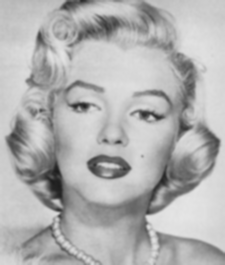

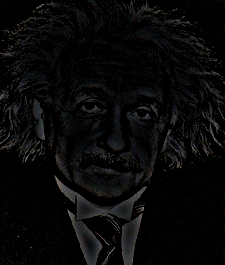

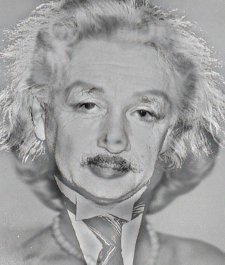

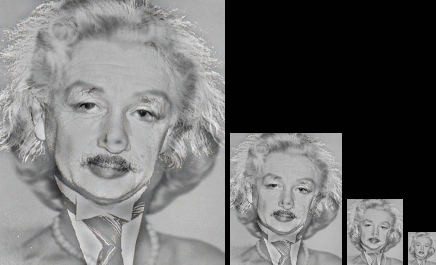

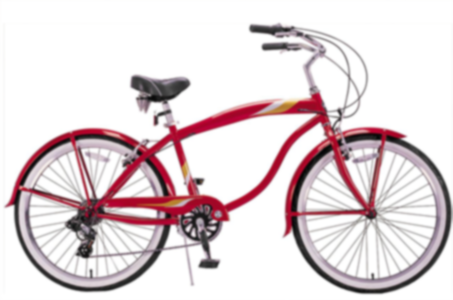

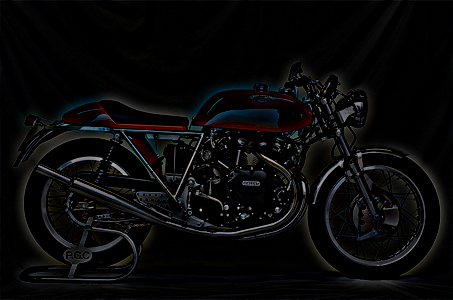

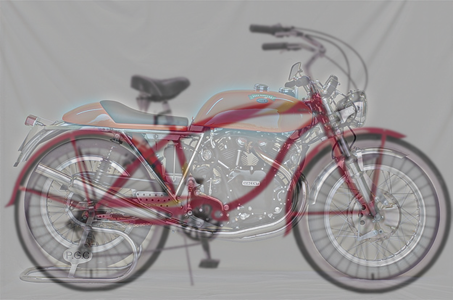

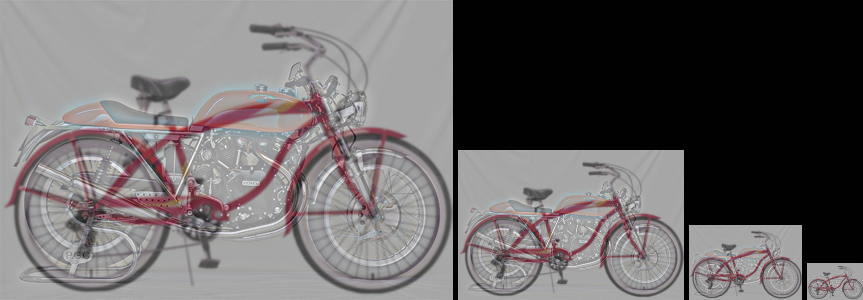

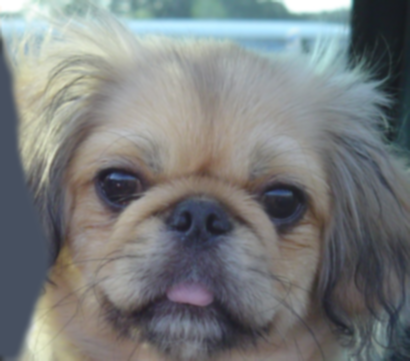

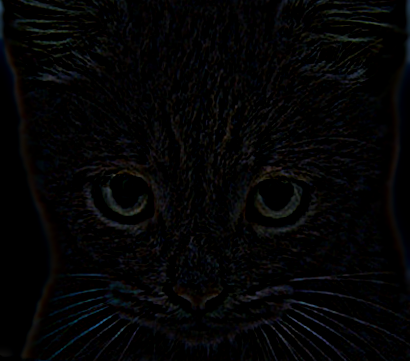

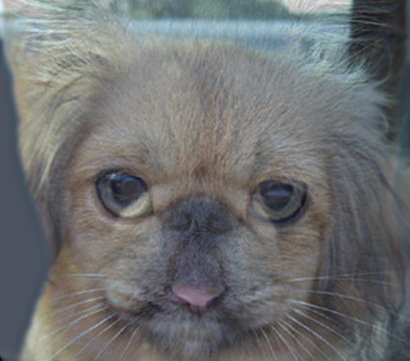

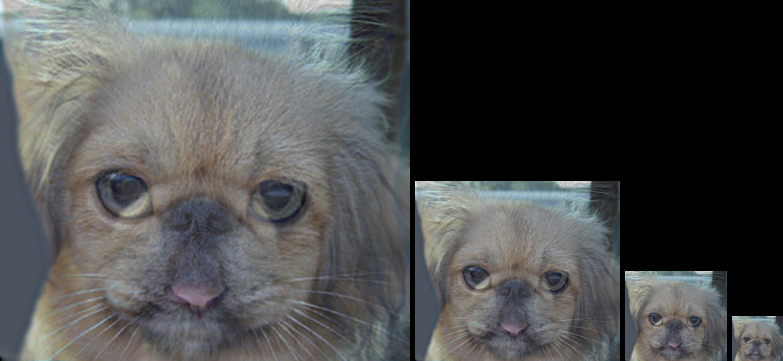

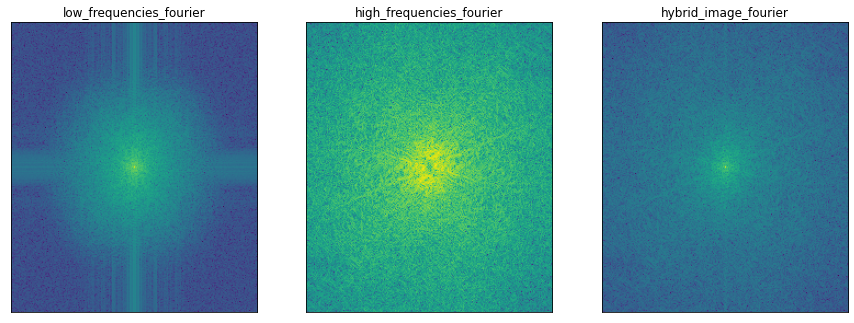

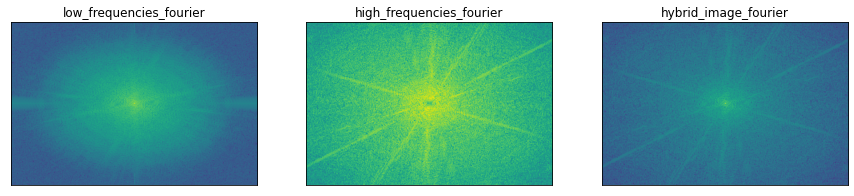

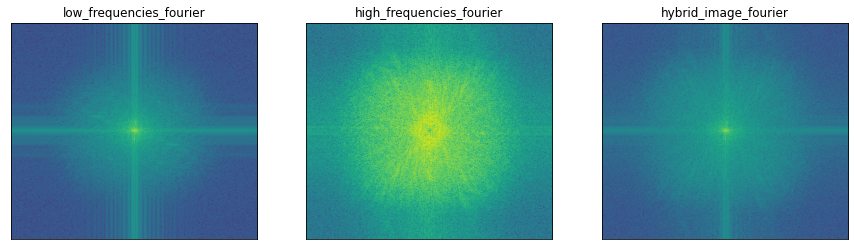

In [3]:
from numpy.linalg import norm
# Import necessary packages here
import cv2
import numpy as np
from matplotlib import pyplot as plt


# image_path1 = '/content/data/dog.bmp'
# image_path2 = '/content/data/cat.bmp'
image_path1 = '/content/data/marilyn.bmp'
image_path2 = '/content/data/einstein.bmp'
image_path3 = '/content/data/bicycle.bmp'
image_path4 = '/content/data/motorcycle.bmp'
image_path5 = '/content/data/dog.bmp'
image_path6 = '/content/data/cat.bmp'
img_1 = read_image(image_path1)
img_2 = read_image(image_path2)
img_3=read_image(image_path3)
img_4=read_image(image_path4)
img_5=read_image(image_path5)
img_6=read_image(image_path6)



def hybrid_image_results(image_1,image_2):

  fig, axes = plt.subplots(1, 3)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  # YOUR CODE HERE: TUNE cutoff_frequency
  cutoff_frequency = 1
  filter_size = (cutoff_frequency*4)+1

  """cutoff_frequency is the standard deviation, in pixels, of the 
  Gaussian blur that will remove the high frequencies from one image (image_1) and 
  remove the low frequencies from another image (image_2) (to do so, subtract a blurred
  version from the original version). You will want to tune this for every image pair to get the best results."""

  filter = gaussian_2D_filter(filter_size, cutoff_frequency)

  """Use imgfilter() to create 'low_frequencies' and 'high_frequencies' and then combine them to create 'hybrid_image'.
  Remove the high frequencies from image_1 by blurring it. The amount of blur that works best will vary with different image pairs."""
  blurred_image1 = imgfilter(image_1, filter)
  low_frequencies = blurred_image1
  cv2_imshow(low_frequencies)

  """Remove the low frequencies from image_2. The easiest way to do this is to
  subtract a blurred version of image_2 from the original version of image_2.
  This will give you an image centered at zero with negative values."""

  cutoff_frequency = 6
  filter_size = cutoff_frequency*4+1
  filter2 = gaussian_2D_filter(filter_size, cutoff_frequency)

  high_frequencies = image_2-imgfilter(image_2,filter2)
  cv2_imshow(high_frequencies)



  """Combine the high frequencies and low frequencies to obtain hybrid_image.""" 
  hybrid_image= low_frequencies+high_frequencies
  hybrid_image=normalize_2(hybrid_image)
  cv2_imshow(hybrid_image)
  h=vis_hybrid_color_image(hybrid_image)

  # axes[1].imshow(hybrid_image,cmap='gray')
  # axes[1].set_title('h'), axes[1].set_xticks([]), axes[1].set_yticks([]);
  # cv2_imshow(h)
  # """Firstly, visualize low_frequencies, high_frequencies, and the hybrid image."""


  # """Secondly, also visualize log magnitude of Fourier Transform of the above.
  low_frequencies_fourier=log_mag_FFT(low_frequencies)
  high_frequencies_fourier=log_mag_FFT(high_frequencies)
  hybrid_image_fourier=log_mag_FFT(hybrid_image)
  axes[0].imshow(low_frequencies_fourier)
  axes[0].set_title('low_frequencies_fourier'), axes[0].set_xticks([]), axes[0].set_yticks([])
  axes[1].imshow(high_frequencies_fourier)
  axes[1].set_title('high_frequencies_fourier'), axes[1].set_xticks([]), axes[1].set_yticks([])
  axes[2].imshow(hybrid_image_fourier)
  axes[2].set_title('hybrid_image_fourier'), axes[2].set_xticks([]), axes[2].set_yticks([])
  cv2_imshow(h)

hybrid_image_results(img_1,img_2)
hybrid_image_results(img_3,img_4)
hybrid_image_results(img_5,img_6)



## **Write-up**


1.   Provide the original and filtered images.
2.   Provide the the hybrid image and hybrid_image_scale using given helper function *vis_hybrid_image*.
3.   Log magnitude of the Fourier transform of the two original images, the filtered images, and the hybrid image.
4.   Briefly explain how this works, using your favorite results as illustrations.



In this problem we are attempting to find the hybrid image of two different image.
A hybrid image is genrated by superimposing two images of different spatial freqeuncy. Low spatial frequency image is obtained by applying a low pass filter.High spatial frquency image is obatined by the high pass filter. Finally we add them.<br>
$H$= $I_1$*$G_1$ + $I_2$(1-$G_2$) where<br>
$G_1$ and $G_2$ are gaussian filters.<br>
$G_1$ is a low pass filter.<br>
$G_2$ is a High pass filter.<br>
$I_1$ and $I_2$ are images.<br>
Here all the operations are in fourier domain.<br>

Interpretation of the results:<br>
There are two different aspects of the hybrid image.
The frequency cut of the low resolution image (the one to be seen at a far distance), and the frequency
cut of the high resolution image (the one to be seen up close).[1] Hence we see different picture if we look at it from different distance.

Furthermore the first images i.e. einstein and marilyn are the best output. Since the image from near looks like einstein and from far it looks like Marilyn.

Finally, it was also observed that grayscale images will give better output.

Sources:
[1] Hybrid images by Aude Oliva,Antonio Torralba,Philippe. G. Schyns

# Part B: Pyramid Image (25 Points)

## Overview
Choose an image that has interesting variety of textures (from Flickr or your own images). The images should be atleast 640X480 pixels and converted to grayscale. Write code for a Gaussian and Laplacian pyramid of level N (use for loops). In each level, the resolution should be reduced by a factor of 2. Show the pyramids for your chosen image in your write-up. Here is an [example](https://drive.google.com/uc?id=17Y287EA-GJ2z0wtm_M7StIWsXyFeHvrz).

## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [4]:
# Download Data -- run this cell only one time per runtime
!gdown 1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
!unzip "/content/hybrid_pyramid_input.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
To: /content/hybrid_pyramid_input.zip
100% 2.19M/2.19M [00:00<00:00, 184MB/s]
Archive:  /content/hybrid_pyramid_input.zip
replace /content/data/Afghan_girl_before.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/data/Afghan_girl_before.jpg  
  inflating: /content/data/motorcycle.bmp  
  inflating: /content/data/cat.bmp   
  inflating: /content/data/makeup_before.jpg  
  inflating: /content/data/fish.bmp  
  inflating: /content/data/bicycle.bmp  
  inflating: /content/data/makeup_after.jpg  
  inflating: /content/data/plane.bmp  
  inflating: /content/data/marilyn.bmp  
  inflating: /content/data/dog.bmp   
  inflating: /content/data/Afghan_girl_after.jpg  
  inflating: /content/data/submarine.bmp  
  inflating: /content/data/bird.bmp  
  inflating: /content/data/einstein.bmp  


## Code

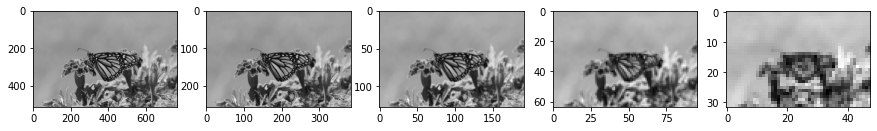

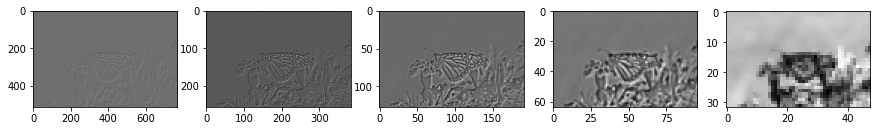

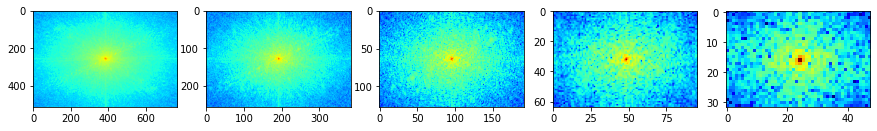

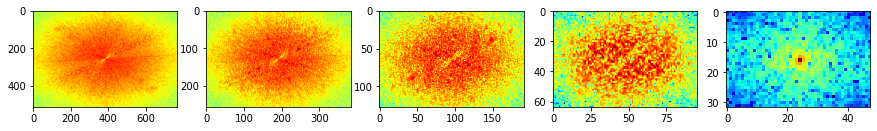

In [5]:
# Populate Helper Functions:
image_1=cv2.imread('/content/py (1).jpg',0)
def downscale(im):
  blur=cv2.GaussianBlur(im,(3,3),1)
  #im2=cv2.resize(im, (im.shape[0]//2, im.shape[1]//2), 0, 0, interpolation = cv2.INTER_NEAREST)

  im2=blur[::2,::2]
  return im2

def upscale(im_1):
 upscaled_image=np.kron(im_1,np.ones((2,2)))
 reg_img=cv2.GaussianBlur(upscaled_image,(3,3),1)
 return reg_img

def pyramidsGL(image, num_levels):
  ''' Creates Gaussian (G) and Laplacian (L) pyramids of level "num_levels" from image im. 
  G and L are list where G[i], L[i] stores the i-th level of Gaussian and Laplacian pyramid, respectively. '''
  G=[image]
  L = []
  while num_levels > 0:
        num_levels -= 1
        image_blur = downscale(image)
        G.append(image_blur)
        expanded_img = upscale(image_blur)
        laplacian = image - expanded_img
        L.append(laplacian)
        image = image_blur
  return G, L
Gaussian, Laplacian=pyramidsGL(image_1,5)
Laplacian[4]=Gaussian[4]
def displayPyramids(G, L):
  '''Role of this function is to display intensity and Fast Fourier Transform (FFT) images of pyramids.
  NOTE: You may re-use your helper function  "log_mag_FFT" to compute this.'''
  # YOUR CODE HERE
  fig, axes = plt.subplots(1, 5)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  for i in range(0,5):
   axes[i].imshow(G[i],cmap='gray')

  fig, axes = plt.subplots(1, 5)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  for i in range(0,5):
   axes[i].imshow(L[i],cmap='gray')
  fig, axes = plt.subplots(1, 5)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  for i in range(0,5):
   axes[i].imshow(log_mag_FFT(G[i]),cmap='jet')  
  fig, axes = plt.subplots(1, 5)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  for i in range(0,5):
   axes[i].imshow(log_mag_FFT(L[i]),cmap='jet')

displayPyramids(Gaussian,Laplacian)   
  

def reconstructLaplacianPyramid(L):
     reconstructed_image=L[-1]
     for i in range(4,0,-1):
      reconstructed_image=upscale(reconstructed_image)
      reconstructed_image= reconstructed_image+L[i-1]
      cv2_imshow((reconstructed_image))
 
     return reconstructed_image

  

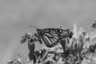

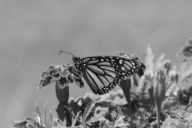

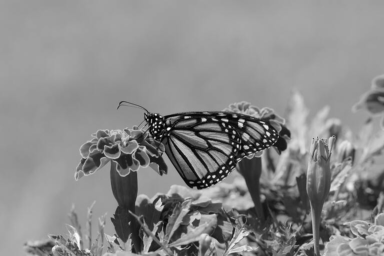

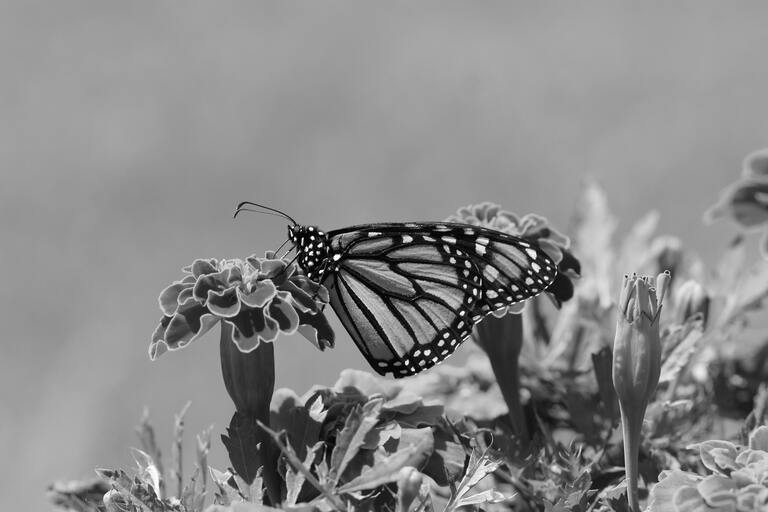

displaying reconstruction
Reconstruction error 0.0


In [6]:
""" 
Steps:
1. Load an image im.
2. Call function pyramidsGL with image and num_levels = 5
3. Call function displayPyramids with G, L
4. Call function reconstructLaplacianPyramid with the generated L
5. Compute reconstruction error with L2 norm and print the error value.
"""

r=reconstructLaplacianPyramid(Laplacian)  
print("displaying reconstruction")

error=np.sqrt(np.sum(np.square(image_1-r)))
print("Reconstruction error",error)


## **Write-up**

1. (10 Points) Display a Gaussian and Laplacian pyramid of level 5 (using your code). It should be formatted similar to [this](https://drive.google.com/file/d/1mAommQeJsp7WS8QCrZRcr8cQiltPPOh2/view?usp=sharing) figure.

2. (10 Points) Display the FFT amplitudes of your Gaussian/Laplacian pyramids Appropriate display ranges (from 0 to 1) should be chosen so that the changes in frequency in different levels of the pyramid are clearly visible. Explain  what the Laplacian and Gaussian pyramids are doing in terms of frequency. [This](https://drive.google.com/file/d/1BqTPKq6Mqqxl5jNNPkvx4JOA5MRgVq08/view?usp=sharing) looks like the expected output.

3. (5 Points) Image Reconstruction


In terms of frequency of the pyramids we can see that $G_5$= $L_5$. That is last two levels of the pyramids are same. Hence we can see that final FFT plots are same for both.

# Part C: Edge detection (25 points)

## Overview
The main steps of edge detection are: (1) assign a score to each pixel; (2) find local maxima along the direction perpendicular to the edge. Sometimes a third step is performed where local evidence is propagated so that long contours are more confident or strong edges boost the confidence of nearby weak edges. Optionally, a thresholding step can then convert from soft boundaries to hard binary boundaries. Here are sample outputs.

<table><tr>
<td> <img src="https://drive.google.com/uc?id=1orUji5-1CzjWmHk0g5y5kOVFhshNfhN8" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=1npyMjhlRAeP1GaukV38SOlCe-O0whX37" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>
<table><tr>
<td> <img src="https://drive.google.com/uc?id=1TX54zNTG6q5ajitwV024FS-nOJiVP2VN" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=1dPPSFDmakh8DQwlpTYmNXJPNHapdZF8S" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

**Hint:** Reading these papers will help understanding and may help with the programming assignment.

[The design and use of steerable filters](http://people.csail.mit.edu/billf/papers/steerpaper91FreemanAdelson.pdf)

[Berkeley Pb Detector](https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/papers/mfm-pami-boundary.pdf)

[Multi-scale edge detection](https://home.ttic.edu/~xren/publication/xren_eccv08_multipb.pdf)

## Data
We have provided 50 test images and the codes associated to download the unzip the data. Your job is to build a simple gradient-based edge detector and to extend it using multiple oriented filters.

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [7]:
# Download Data -- run this cell only one time per runtime
!gdown 1zgblBWTQ847yZKnRmM1QrRiEWu1WvEo7
!unzip "/content/edge_detection_inputs.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1zgblBWTQ847yZKnRmM1QrRiEWu1WvEo7
To: /content/edge_detection_inputs.zip
100% 3.82M/3.82M [00:00<00:00, 92.5MB/s]
Archive:  /content/edge_detection_inputs.zip
replace /content/edge_detection_inputs/65033.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/edge_detection_inputs/65033.jpg  
  inflating: /content/edge_detection_inputs/21077.jpg  
  inflating: /content/edge_detection_inputs/41033.jpg  
  inflating: /content/edge_detection_inputs/12084.jpg  
  inflating: /content/edge_detection_inputs/108082.jpg  
  inflating: /content/edge_detection_inputs/38082.jpg  
  inflating: /content/edge_detection_inputs/45096.jpg  
  inflating: /content/edge_detection_inputs/42049.jpg  
  inflating: /content/edge_detection_inputs/89072.jpg  
  inflating: /content/edge_detection_inputs/69020.jpg  
  inflating: /content/edge_detection_inputs/103070.jpg  
  inflating: /content/edge_detection_inputs/38092.jpg  
  inflating: /content/edg

In [8]:
# Import necessary packages
import numpy as np
import cv2
from google.colab.patches import cv2_imshow ## Use this to show image in colab

img_path = "/content/edge_detection_inputs/21077.jpg" ## add the path here
img1 = cv2.imread("/content/edge_detection_inputs/21077.jpg")
img2=cv2.imread('/content/edge_detection_inputs/101085.jpg')
img3= cv2.imread('/content/edge_detection_inputs/101087.jpg')
img4=cv2.imread('/content/edge_detection_inputs/105025.jpg')
img5=cv2.imread('/content/edge_detection_inputs/108070.jpg')

## Subpart 1: Simple edge detection (8 points)
Build a simple gradient-based edge detector that includes the following functions
```
def gradientMagnitude(im, signma)
```
This function should take an RGB image as input, smooth the image with Gaussian std=sigma, compute the x and y gradient values of the smoothed image, and output image maps of the gradient magnitude and orientation at each pixel. You can compute the gradient magnitude of an RGB image by taking the L2-norm of the R, G, and B gradients. The orientation can be computed from the channel corresponding to the largest gradient magnitude. The overall gradient magnitude is the L2-norm of the x and y gradients. mag and theta should be the same size as im.

```
def edgeGradient(im):
```
This function should use gradientMagnitude to compute a soft boundary map and then perform non-maxima suppression. For this assignment, it is acceptable to perform non-maxima suppression by retaining only the magnitudes along the binary edges produce by the Canny edge detector: `cv2.Canny(im)`. 

If desired, the boundary scores can be rescaled, e.g., by raising to an exponent: `mag2 = mag.^0.7` , which is primarily useful for visualization. 


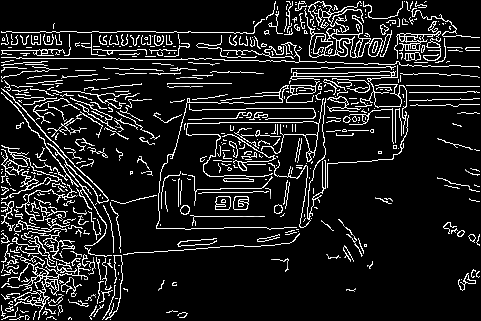

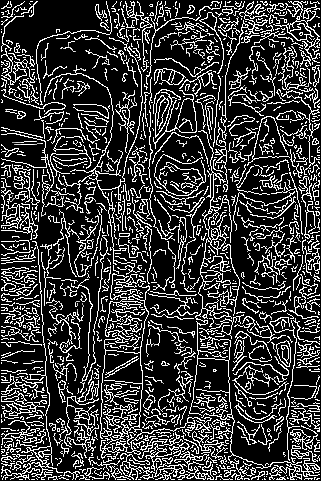

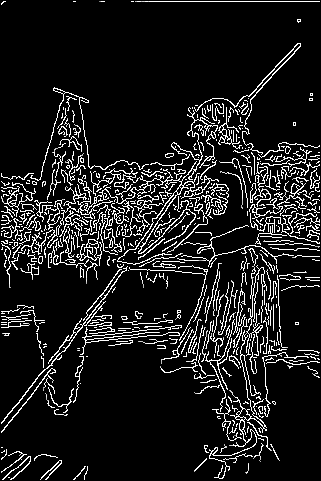

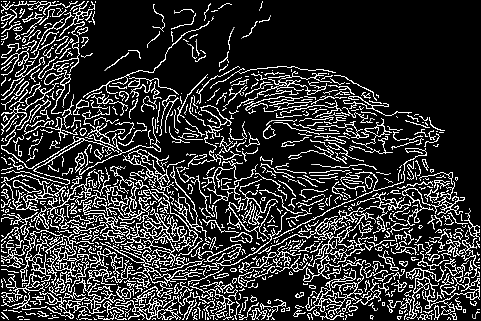

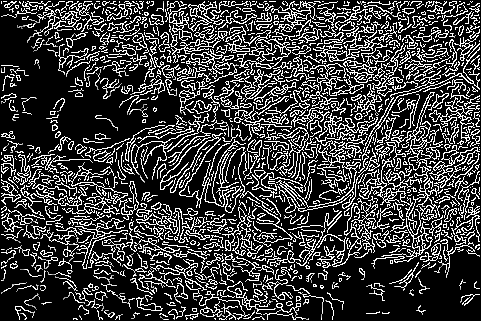

In [9]:
from scipy import misc
from skimage import feature
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, sobel
from tqdm import *

# fig = plt.figure()
# plt.gray()  # show the filtered result in grayscale
# ax1 = fig.add_subplot(121)  # left side
# ax2 = fig.add_subplot(122)  # right side
# ascent = misc.ascent()
# result = gaussian_filter(ascent, sigma=5)
# ax1.imshow(img)

# plt.show()

def gradientMagnitude(im, sigma):
  '''
  im: input image
  sigma: standard deviation value to smooth the image
  

  outputs: gradient magnitude and gradient direction of the image
  '''
  size=4 *sigma +1
  filt=gaussian_2D_filter(size,sigma)
  
  img=imgfilter(im,filt)
  
  dx, dy = sobel(img, axis=0),sobel(img, axis=1)
  mag=np.hypot(dx,dy)
  ddx=np.zeros(img.shape[:2])
  ddy=np.zeros(img.shape[:2])


  for i in (range(img.shape[0])):
    for j in range(img.shape[1]):
          maxmag_loc=np.argmax([mag[i,j,:]])
          ddx[i,j]=dx[i,j,maxmag_loc]
          ddy[i,j]=dy[i,j,maxmag_loc]
    

  theta=np.arctan2(ddy,ddx)  
  mag=np.sqrt(np.sum(np.square(mag),axis=2))
  magnitude=np.hypot(ddx,ddy)
  
  return mag,theta

def edgeGradient(im):
  '''
  im: input image

  output: a soft boundary map of the image
  '''
  ## YOUR CODE HERE

  magnitude_img,theta=gradientMagnitude(im,1)
  mag2=magnitude_img**(1)
  gray_scale_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
  edges=feature.canny(gray_scale_image)
  boundrymap=mag2*edges
  cv2_imshow(boundrymap)
 


edgeGradient(img1)
edgeGradient(img2)
edgeGradient(img3)
edgeGradient(img4)
edgeGradient(img5)









  


## Subpart 2: Improved Edge Detection (8 points)
Try to improve your results using a set of oriented filters, rather than the simple derivative of Gaussian approach above, including the following functions:
```
def orientedFilterMagnitude(im):
```
Computes the boundary magnitude and orientation using a set of oriented filters, such as elongated Gaussian derivative filters. Explain your choice of filters in the write-up. Use at least four orientations. One way to combine filter responses is to compute a boundary score for each filter (simply by filtering with it) and then use the max and argmax over filter responses to compute the magnitude and orientation for each pixel.
```
def edgeOrientedFilters(im):
```
Similar to Subpart 1, this should call orientedFilterMagnitude, perform the non-maxima suppression, and output the final soft edge map.

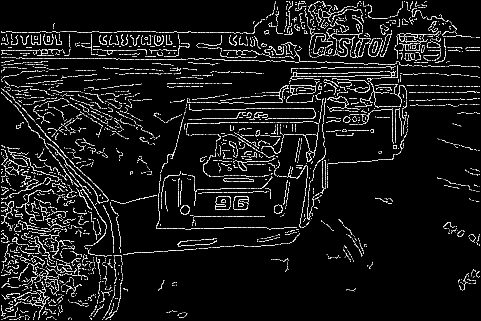

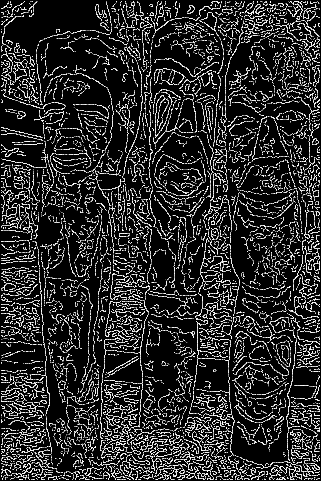

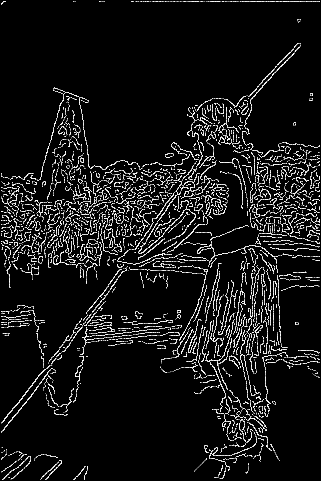

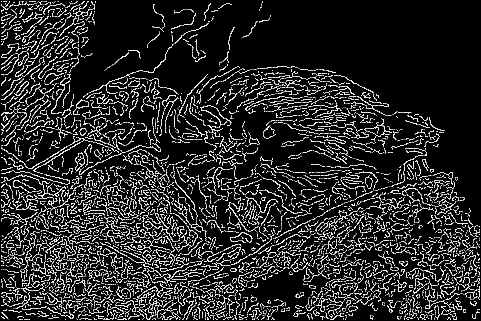

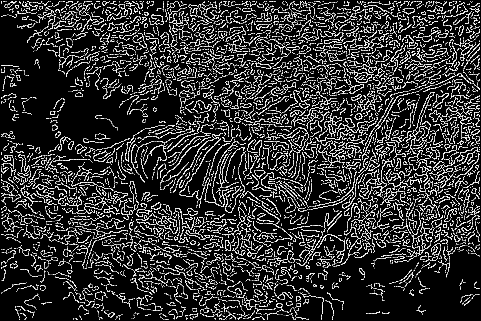

In [10]:
import imutils
from scipy.ndimage import correlate
def orientedFilterMagnitude(im):
  '''
  im: input image
  

  outputs: gradient magnitude and gradient direction of the image
  '''

  kernel=3
  sigma=1
  gaussian=gaussian_2D_filter(kernel,sigma)
  x_derivative=np.array([[-1,0,1]])
  Derivative_of_gaussian=correlate(gaussian,x_derivative)
  filters=np.zeros((kernel,kernel,4))
  filters[:,:,0]=imutils.rotate(Derivative_of_gaussian,0) # filter in x direction
  filters[:,:,1]=imutils.rotate(Derivative_of_gaussian,90) # fiter in y direction
  # filters[:,:,0]=sobel(im, axis=0)
  filters[:,:,2]=imutils.rotate(Derivative_of_gaussian,45) # filter at 45 degree
  filters[:,:,3]=imutils.rotate(Derivative_of_gaussian,135) # filter at 135 
  # d1=imgfilter(im,filters[:,:,0])
  # d2=imgfilter(im,filters[:,:,1])
  d1=sobel(im, axis=0)
  d2=sobel(im, axis=1)
  d3=imgfilter(im,filters[:,:,2])
  d4=imgfilter(im,filters[:,:,3])
  mag_o=np.empty((im.shape[:2]))
  for i in range (mag_o.shape[0]):
    for j in range (mag_o.shape[1]):
      l1=np.argmax(d1[i,j,:])
      l2=np.argmax(d2[i,j,:])
      l3=np.argmax(d3[i,j,:])
      l4=np.argmax(d4[i,j,:])
      mag_o[i,j]=max([d1[i,j,l1],d2[i,j,l2],d3[i,j,l3],d4[i,j,l4]])
      


  return mag_o

def edgeOrientedFilters(im):
  '''
  im: input image

  output: a soft boundary map of the image
  '''
  ## YOUR CODE HERE
  magnitude_img=orientedFilterMagnitude(im)
  mag2=magnitude_img**(1)
  gray_scale_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
  edges=feature.canny(gray_scale_image)
  boundrymap=mag2*edges
  output=boundrymap
  cv2_imshow(output)


edgeOrientedFilters(img1)
edgeOrientedFilters(img2)
edgeOrientedFilters(img3)
edgeOrientedFilters(img4)
edgeOrientedFilters(img5)



## Write-up (9 points)

1.   **(2 points)** Description of any design choices and parameters
2.   **(1 points)** The bank of filters used for Subpart 2 ([plt.imshow with extent](https://stackoverflow.com/questions/13384653/imshow-extent-and-aspect/13390798#13390798) or [cv2.normalize to convert output into grayscale](https://stackoverflow.com/questions/39808545/implement-mat2gray-in-opencv-with-python) may help with visualization)
3.   **(5 points)** Qualitative results: choose five example images; show input images and outputs of each edge detector
4.   **(1 points)** Discuss the quality of your outputs and state one possible way for improvement. Improvements could provide, for example, a better boundary pixel score or a better suppression technique. Your idea could come from a paper you read, but cite any sources of ideas.



Here we have selected sobel filters for gradients in x and y direction.
And for the edgeoriented filter we are using gaussian filter and taking its derivative. 
Here we have have selected the standard deviation of the gaussian filter such that it will clear the noise from the image. We tried different values of the sigma.

For improving the edge detection we can use k-means clustering. One such method is finding 3 attributes of a pixel using simalrity between it 8 surrounding pixels. And then feed these 3 atrributes to the clustering system.

# Part D: Template Matching (25 points) 

## Overview
The goal of this part is to build a template maching algorithm for where's waldo puzzle. 
The end product should be finding waldo in puzzle images. 


## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**


In [11]:
# Download Data -- run this cell only one time per runtime
!gdown 1_PHimFhPSajbTWzAL6-PwM803uzA7Ymb
!unzip "/content/Part4_data.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1_PHimFhPSajbTWzAL6-PwM803uzA7Ymb
To: /content/Part4_data.zip
100% 2.04M/2.04M [00:00<00:00, 124MB/s]
Archive:  /content/Part4_data.zip
replace /content/__MACOSX/._Part4_data? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/__MACOSX/._Part4_data  
  inflating: /content/Part4_data/.DS_Store  
  inflating: /content/__MACOSX/Part4_data/._.DS_Store  
  inflating: /content/__MACOSX/Part4_data/._puzzle2  
  inflating: /content/__MACOSX/Part4_data/._puzzle1  
  inflating: /content/Part4_data/puzzle2/waldo.png  
  inflating: /content/__MACOSX/Part4_data/puzzle2/._waldo.png  
  inflating: /content/Part4_data/puzzle2/map.jpg  
  inflating: /content/__MACOSX/Part4_data/puzzle2/._map.jpg  
  inflating: /content/Part4_data/puzzle1/waldo.jpg  
  inflating: /content/__MACOSX/Part4_data/puzzle1/._waldo.jpg  
  inflating: /content/Part4_data/puzzle1/pic1.jpeg  
  inflating: /content/__MACOSX/Part4_data/puzzle1/._pic1.jpeg  
  inflating: 

## Code

We provide the following functions for plotting your results 


In [12]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_image(im,title,xticks=[],yticks= [],cv2 = True):
    """
    im :Image to plot
    title : Title of image 
    xticks : List of tick values. Defaults to nothing
    yticks :List of tick values. Defaults to nothing 
    cv2 :Is the image cv2 image? cv2 images are BGR instead of RGB. Default True
    """
    plt.figure()
    plt.imshow(im[:,:,::-1])
    plt.title(title)
    plt.xticks(xticks)
    plt.yticks(yticks)

It is always advised for you to visualize and get familar with waldo and puzzle image. 

Visualize both the waldo and puzzle images.

In [13]:
map=cv2.imread('/content/Part4_data/puzzle1/pic1.jpeg')
waldo=cv2.imread('/content/Part4_data/puzzle1/waldo.jpg')

### Subpart 1: Template Matching with OpenCV
OpenCV provide Template Matching functions below link. 

https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

You can use this function for implementing simple where's waldo algorithm.

This part helps you to understand the concepts of Template Matching and OpenCV Library. This is just for reference.

(2544, 1341)


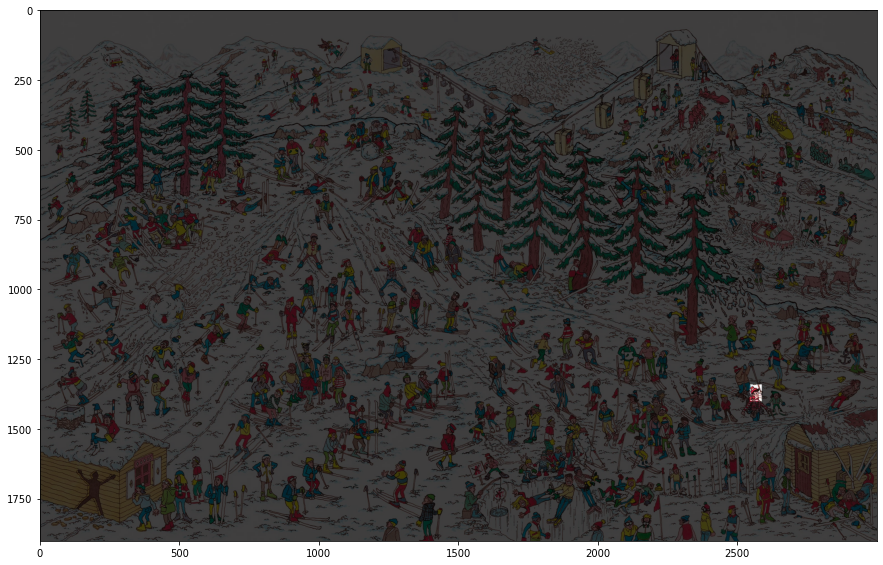

In [14]:
(waldoHeight, waldoWidth) = waldo.shape[:2]
result = cv2.matchTemplate(map, waldo, cv2.TM_CCOEFF)
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)
print(maxLoc)

# grab the bounding box of waldo and extract him from the puzzle image
topLeft = maxLoc
botRight = (topLeft[0] + waldoWidth, topLeft[1] + waldoHeight)
roi = map[topLeft[1] : botRight[1], topLeft[0] : botRight[0]]

# construct a darkened transparent 'layer' to darken everything
# in the map except for Waldo
mask = np.zeros(map.shape, dtype = "uint8")
map = cv2.addWeighted(map, 0.25, mask, 0.75, 0)

map[topLeft[1] : botRight[1], topLeft[0] : botRight[0]] = roi

# display the images
result_rgb = cv2.cvtColor(map, cv2.COLOR_RGB2BGR)
plt.figure(figsize = (15, 15))
plt.imshow(result_rgb)

### Subpart 2: Template Matching from Scratch

Implement the Sum of Squared Distance (SSD) template matching algorithm from scratch (Don't use cv2.matchTemplate).

Then, show the results of where's waldo for two puzzle images.

Hints: You can borrow the codes from Part1 and Part2. Please read methods for matching with filters in Lecture Slide.  

In [15]:
from tqdm import tqdm
def SSD(p_1,p_2):
  ssd=np.sum(np.square(p_1-p_2))
  return ssd

def find_waldo(template,image) :
  h_t,w_t=template.shape[:2]
  h_i,w_i=image.shape[:2]
  ssd_matrix=np.empty((h_i-h_t,w_i-w_t))
  sum_temp=float('inf')
  for i in tqdm(range(0,h_i-h_t)):
    for j in (range(0,w_i-w_t)):
      temp_SSD=SSD(image[i:i+h_t,j:j+w_t],template)
      ssd_matrix[i,j]=SSD(image[i:i+h_t,j:j+w_t],template)
      if temp_SSD < sum_temp:
        sum_temp=temp_SSD
        loc=[i,j]
   
  return loc,ssd_matrix  



In [16]:
loc_1,ssd_matrix_out=find_waldo(waldo,map)

100%|██████████| 1841/1841 [03:43<00:00,  8.23it/s]


In [17]:


result = np.where(ssd_matrix_out == np.amin(ssd_matrix_out))
print(result)
print(reversed(loc_1))



(array([1341]), array([2544]))


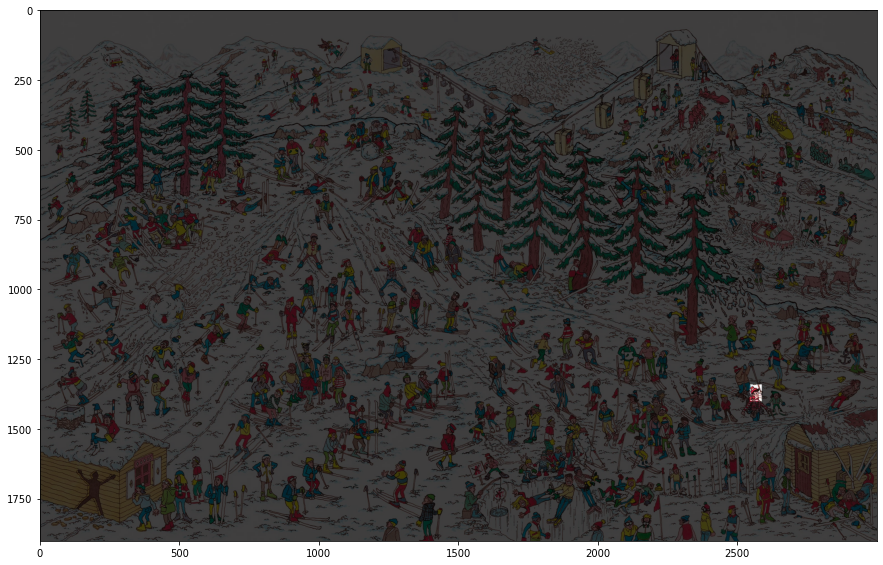

In [18]:


from google.colab.patches import cv2_imshow
image=cv2.imread('/content/Part4_data/puzzle1/pic1.jpeg')
row,col=waldo.shape[:2]
topLeft = [loc_1[1],loc_1[0]]
botRight = (topLeft[0] + col, topLeft[1] + row)
roi = image[topLeft[1] : botRight[1], topLeft[0] : botRight[0]]

# construct a darkened transparent 'layer' to darken everything
# in the map except for Waldo
mask = np.zeros(image.shape, dtype = "uint8")
image = cv2.addWeighted(image, 0.25, mask, 0.75, 0)

image[topLeft[1] : botRight[1], topLeft[0] : botRight[0]] = roi

# display the images
result_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize = (15, 15))
plt.imshow(result_rgb)


In [19]:
map_2=cv2.imread('/content/Part4_data/puzzle2/map.jpg')
waldo_2=cv2.imread('/content/Part4_data/puzzle2/waldo.png')

100%|██████████| 694/694 [00:25<00:00, 27.39it/s]


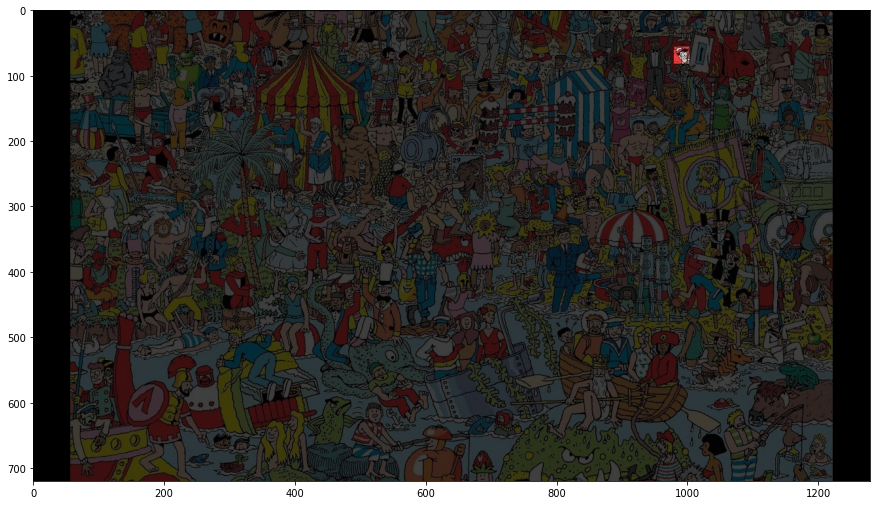

In [20]:
loc_2,ssd_matrix_out_2=find_waldo(waldo_2,map_2)
from google.colab.patches import cv2_imshow
image=cv2.imread('/content/Part4_data/puzzle2/map.jpg')
row,col=waldo_2.shape[:2]
topLeft = [loc_2[1],loc_2[0]]
botRight = (topLeft[0] + col, topLeft[1] + row)
roi = image[topLeft[1] : botRight[1], topLeft[0] : botRight[0]]

# construct a darkened transparent 'layer' to darken everything
# in the map except for Waldo
mask = np.zeros(image.shape, dtype = "uint8")
image = cv2.addWeighted(image, 0.25, mask, 0.75, 0)

image[topLeft[1] : botRight[1], topLeft[0] : botRight[0]] = roi

# display the images
result_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize = (15, 15))
plt.imshow(result_rgb)
